In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.datasets import load_breast_cancer
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer, PowerTransformer, KBinsDiscretizer, OneHotEncoder,\
LabelEncoder
import seaborn as sns
%matplotlib inline

### 결측치 처리

- 결측치 확인

In [2]:
wine = pd.read_csv('./data/2-1_wine.csv', index_col=0)
print('**원본 데이터:\n', wine.isna().sum())

**원본 데이터:
 class                           0
Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64


In [3]:
# 결측치가 없으므로 두 개의 컬럼(Alcohol, Ash)에 임의로 결측치를 입력함.
# randint(최소, 최대, 개수)
wine_m = wine.copy()

for col in ['Alcohol', 'Ash'] : 
    for i in range(20) : 
        random_idx = np.random.randint(0, len(wine), 1)
        wine_m.loc[random_idx, col] = np.nan

print('\n**결측치 생성 데이터:\n', wine_m.isna().sum())


**결측치 생성 데이터:
 class                            0
Alcohol                         19
Malicacid                        0
Ash                             19
Alcalinity_of_ash                0
Magnesium                        0
Total_phenols                    0
Flavanoids                       0
Nonflavanoid_phenols             0
Proanthocyanins                  0
Color_intensity                  0
Hue                              0
0D280_0D315_of_diluted_wines     0
Proline                          0
dtype: int64


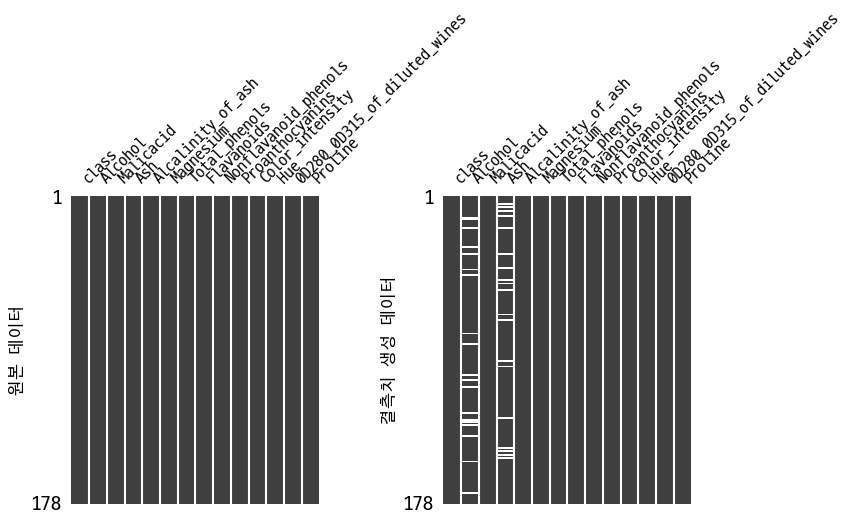

In [4]:
# plotting 환경 설정
plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['font.family'] = 'D2Coding'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(1, 2, figsize=(8,4))
plt.subplots_adjust(wspace=0.5)

# 결측치 시각화(missingno)
msno.matrix(df=wine, figsize=(5,5), fontsize=12, ax=ax[0], sparkline=False)
ax[0].set_ylabel('원본 데이터')

msno.matrix(df=wine_m, figsize=(5,5), fontsize=12, ax=ax[1], sparkline=False)
ax[1].set_ylabel('결측치 생성 데이터')

plt.show()

- zero imputation과 constant imputaion

In [5]:
# 대치 전: wine_m
print(wine_m[['Alcohol','Ash']].head(10))

   Alcohol   Ash
0    14.23  2.43
1    13.20  2.14
2    13.16  2.67
3    14.37  2.50
4    13.24   NaN
5    14.20  2.45
6    14.39   NaN
7    14.06  2.61
8    14.83   NaN
9    13.86  2.27


In [6]:
# 0으로 대치 후: wine_imp
wine_imp = wine_m.fillna(0)
print(wine_imp[['Alcohol','Ash']].head(10))

   Alcohol   Ash
0    14.23  2.43
1    13.20  2.14
2    13.16  2.67
3    14.37  2.50
4    13.24  0.00
5    14.20  2.45
6    14.39  0.00
7    14.06  2.61
8    14.83  0.00
9    13.86  2.27


In [7]:
# 1000으로 대치 후: wine_imp
wine_imp = wine_m.fillna(1000)
print(wine_imp[['Alcohol','Ash']].head(10))

   Alcohol      Ash
0    14.23     2.43
1    13.20     2.14
2    13.16     2.67
3    14.37     2.50
4    13.24  1000.00
5    14.20     2.45
6    14.39  1000.00
7    14.06     2.61
8    14.83  1000.00
9    13.86     2.27


- 대표값으로 채우는 방법

In [8]:
# 대표값으로 채우기 전: wine_m
print(wine_m[['Alcohol','Ash']].head(10))

   Alcohol   Ash
0    14.23  2.43
1    13.20  2.14
2    13.16  2.67
3    14.37  2.50
4    13.24   NaN
5    14.20  2.45
6    14.39   NaN
7    14.06  2.61
8    14.83   NaN
9    13.86  2.27


In [9]:
# 대표값(mean)으로 채운 후: wine_imp1
# 전략 : 평균, 중위수, 최빈값
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
wine_imp1 = imputer.fit_transform(wine_m)
wine_imp1 = pd.DataFrame(wine_imp1, columns=wine_m.columns)

In [10]:
Al_mean = wine_m['Alcohol'].mean()
As_mean = wine_m['Ash'].mean()

In [11]:
print(f'Alcohol mean: {Al_mean:.5f}, Ash mean: {As_mean:.5f}')
print(wine_imp1[['Alcohol','Ash']].head(10))

Alcohol mean: 12.98981, Ash mean: 2.36692
   Alcohol       Ash
0    14.23  2.430000
1    13.20  2.140000
2    13.16  2.670000
3    14.37  2.500000
4    13.24  2.366918
5    14.20  2.450000
6    14.39  2.366918
7    14.06  2.610000
8    14.83  2.366918
9    13.86  2.270000


- 단순확률대치법
  1) Hot-deck : 연구와 비슷한 성향의 데이터
  2) Cold-deck : 외부 출처/이전의 비슷한 연구의 데이터

In [12]:
# Hot-deck 대치 후: wine_imp2
# Hot-deck 함수 정의
def HotDeck(data, reference) : 
    imp = data.copy()
    check = imp.isna().sum()
    for col, val in zip(check.index, check.values) : 
        if val == 0 : 
            continue
        else : 
            imp[col] = imp[col].apply(lambda x: 
                                      float(reference[col].sample(1).values) 
                                      if str(x) == 'nan' else x)
    return imp

In [13]:
# wine 데이터가 wine_m 데이터와 비슷한 성향을 가졌다고 가정하고 랜덤 샘플링함.
wine_imp2 = HotDeck(wine_m, wine)
wine_imp2.isna().sum()

class                           0
Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64

- 다른 변수들로부터 모델링하여 결측값을 예측하는 방법

In [14]:
# KNNImputer 대치 후: wine_imp3
imputer = KNNImputer(n_neighbors=3)
wine_imp3 = imputer.fit_transform(wine_m)
wine_imp3 = pd.DataFrame(wine_imp3, columns=wine_m.columns)
wine_imp3.isna().sum()

class                           0
Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64

- 보간법

In [15]:
# 선형보간법 후: wine_imp4
wine_imp4 = wine_m.interpolate(method='linear')
wine_imp4.isna().sum()

class                           0
Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64

- 실제값과 대치값의 비교

In [16]:
# 결측치가 있는 행의 인덱스를 찾는 함수 정의
def find_missing_idx(data, column) : 
    return np.argwhere(np.array(data[[column]].isna().sum(axis=1))>0).ravel()

In [17]:
# Alcohol feature 기준으로 대치값 비교
feature = 'Alcohol'
missing_idx = find_missing_idx(wine_m, feature)

report = pd.DataFrame({'실제값':wine[feature], 'mean대치':wine_imp1[feature],
                       'HotDeck':wine_imp2[feature], 'KNN대치':wine_imp3[feature],
                       '선형보간':wine_imp4[feature]})

missing_report = report.iloc[missing_idx,:]

score_report = pd.DataFrame(index=['MAE','MSE'])

for col in missing_report.columns : 
    mae = mean_absolute_error(missing_report['실제값'],missing_report[col])
    mse = mean_squared_error(missing_report['실제값'],missing_report[col])
    score_report.loc['MAE', col] = mae
    score_report.loc['MSE', col] = mse
print(score_report)

     실제값    mean대치   HotDeck     KNN대치      선형보간
MAE  0.0  0.779990  1.077368  0.499649  0.415175
MSE  0.0  0.823596  1.705826  0.542971  0.214001


In [18]:
# Ash feature 기준으로 대치값 비교
feature = 'Ash'
missing_idx = find_missing_idx(wine_m, feature)

report = pd.DataFrame({'실제값':wine[feature], 'mean대치':wine_imp1[feature],
                       'HotDeck':wine_imp2[feature], 'KNN대치':wine_imp3[feature],
                       '선형보간':wine_imp4[feature]})

missing_report = report.iloc[missing_idx,:]

score_report = pd.DataFrame(index=['MAE','MSE'])

for col in missing_report.columns : 
    mae = mean_absolute_error(missing_report['실제값'], missing_report[col])
    mse = mean_squared_error(missing_report['실제값'], missing_report[col])
    score_report.loc['MAE', col] = mae
    score_report.loc['MSE', col] = mse
print(score_report)

     실제값    mean대치   HotDeck     KNN대치      선형보간
MAE  0.0  0.171619  0.283158  0.199825  0.236053
MSE  0.0  0.046078  0.123811  0.063613  0.075825


### 이상치 처리

- 절단

In [19]:
# 이상치 절단 함수 정의
def del_outlier(df, columns, method='iqr') : 
    columns = np.array(columns).flatten().tolist()
    check_df = df.loc[:, columns]
    if method == 'iqr' : 
        IQR = check_df.quantile(0.75) - check_df.quantile(0.25)
        top = check_df.quantile(0.75) + IQR * 1.5
        down = check_df.quantile(0.25) - IQR * 1.5
    elif method == 'esd' : 
        std = check_df.std()
        mean = check_df.mean()
        top = mean + std * 3
        down = mean - std * 3
    prep_dfs = []
    for col in columns : 
        out_id = check_df[(check_df[col] >= top[col])|
                          (check_df[col] <= down[col])][col].index
        check_df.drop(out_id, axis=0, inplace=True) # 이상치 제거하기
        prep_dfs.append(check_df[[col]])
    if len(prep_dfs) == 1 :
        prep_dfs = prep_dfs[0]
    return prep_dfs


In [20]:
# 이상치 처리 전후 시각화 함수 정의
def before_after_boxplot(df1,df2,figsize=(10,5),fontsize=13) : 
    fig, axes = plt.subplots(1,2)
    plt.rcParams['figure.figsize'] = figsize
    plt.rcParams['font.size'] = fontsize
    plt.rcParams['axes.unicode_minus'] = False

    for data, ax, title in zip([df1,df2], axes, ['Before','After']) : 
        data.boxplot(ax=ax)
        ax.set_title(f'{title} ({len(data)})')
        margin = df1.std().values[0]/2
        ax.set_ylim(df1.min().values[0]-margin, df1.max().values[0]+margin)
    plt.show()

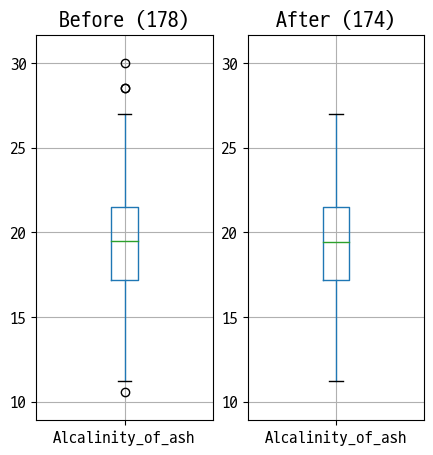

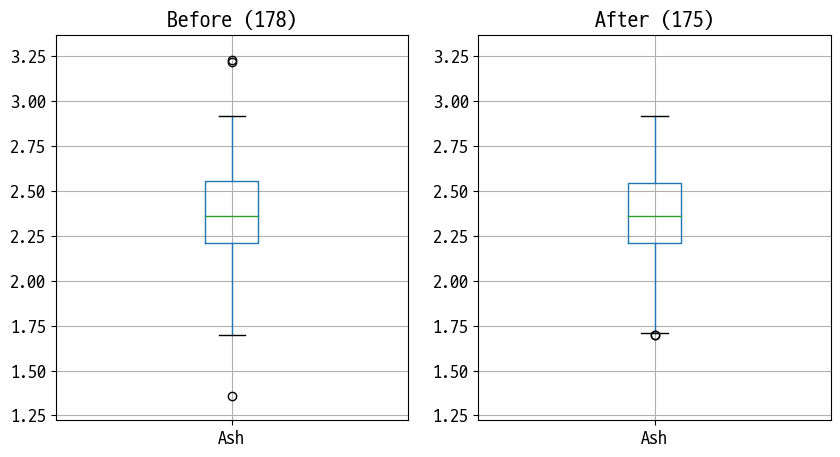

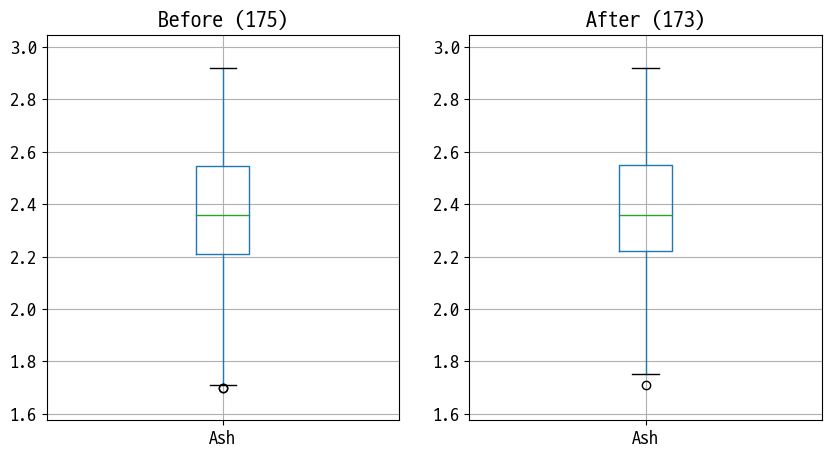

In [21]:
# prep_Alcal = prep_Ash = del_outlier(wine, ['Alcalinity_of_ash', 'Ash'], method='iqr')
prep_Alcal = del_outlier(wine, ['Alcalinity_of_ash'], method='iqr')
prep_Ash = del_outlier(wine, ['Ash'], method='iqr')

# Alcalinity_of_ash의 이상치 제거 전후
before = wine[['Alcalinity_of_ash']]
before_after_boxplot(before, prep_Alcal)

# Ash의 이상치 제거 전후
before = wine[['Ash']]
before_after_boxplot(before, prep_Ash)

# Ash의 두번째 이상치 제거 전후
before = prep_Ash
prep_Ash2 = del_outlier(prep_Ash, 'Ash')
before_after_boxplot(before, prep_Ash2)

- 조정 : 이상치를 경계값으로 보정

In [22]:
# 이상치 조정 함수 정의
def win_outlier(df, columns, method='iqr') : 
    columns = np.array(columns).flatten().tolist()
    check_df = df.loc[:,columns]
    if method == 'iqr' : 
        IQR = check_df.quantile(0.75)-check_df.quantile(0.25)
        top = check_df.quantile(0.75)+IQR*1.5
        down = check_df.quantile(0.25)-IQR*1.5
    elif method == 'esd' : 
        std = check_df.std()
        mean = check_df.mean()
        top = mean + std*3
        down = mean - std*3
    for col in columns : 
        check_df[col] = check_df[col].clip(down[col], top[col])
    return check_df

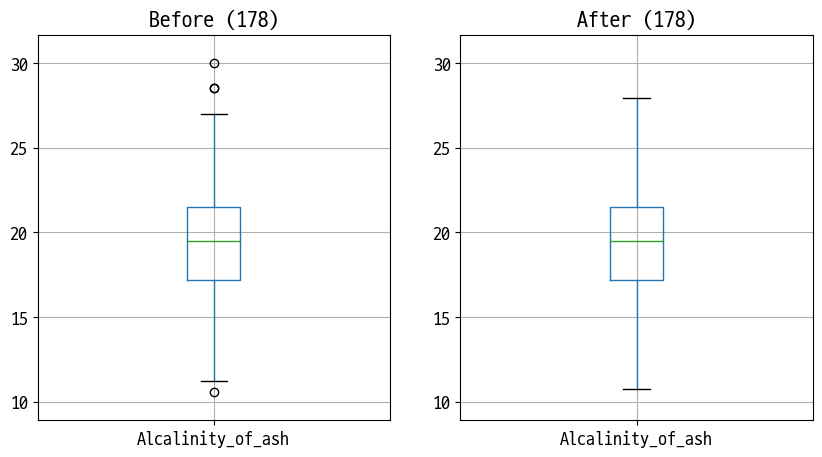

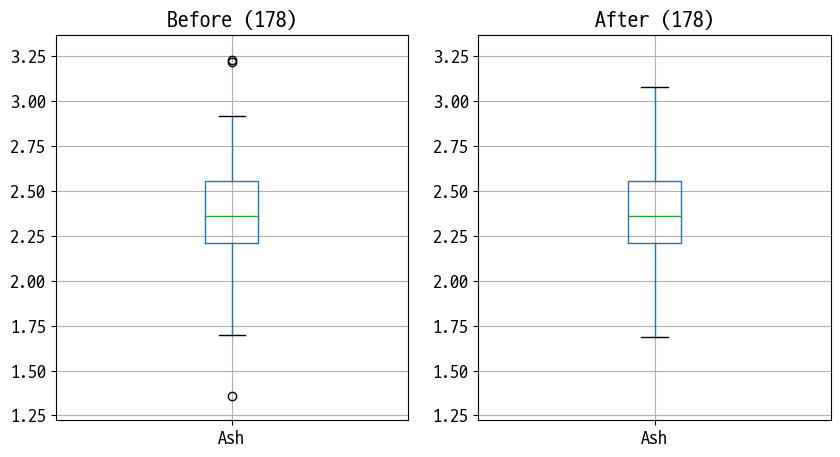

In [23]:
preps = win_outlier(wine, ['Alcalinity_of_ash','Ash'])

# Alcalinity_of_ahs의 이상치 조정 전후
before = wine[['Alcalinity_of_ash']]
before_after_boxplot(before, preps[['Alcalinity_of_ash']])

# Ash의 이상치 조정 전후
before = wine[['Ash']]
before_after_boxplot(before, preps[['Ash']])

- 클리핑(Clipping) : 이상치의 상한과 하한을 특정 숫자로 설장해서 이상치를 상한값과 하한값으로 보정하는 방법

In [24]:
# 이상치 클리핑 함수 정의
def clip_outlier(df, columns, downtop) : 
    columns = np.array(columns).flatten().tolist()
    check_df = df.loc[:,columns]
    for col, dt in zip(columns, downtop) : 
        check_df[col] = check_df[col].clip(dt[0], dt[1])
    return check_df

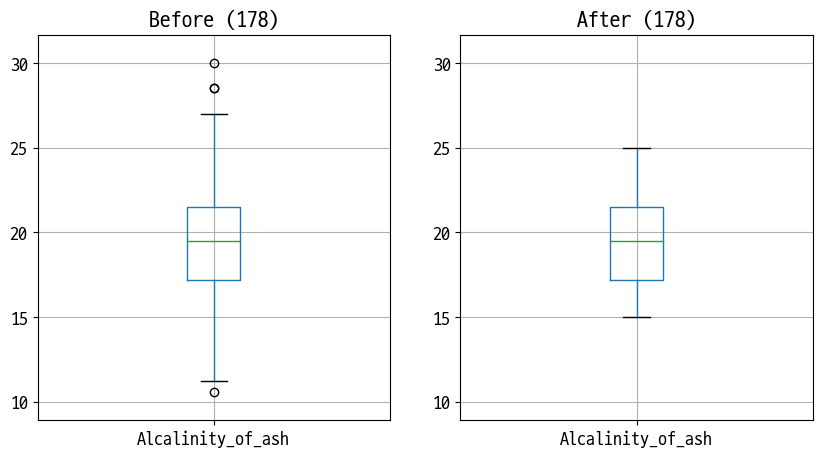

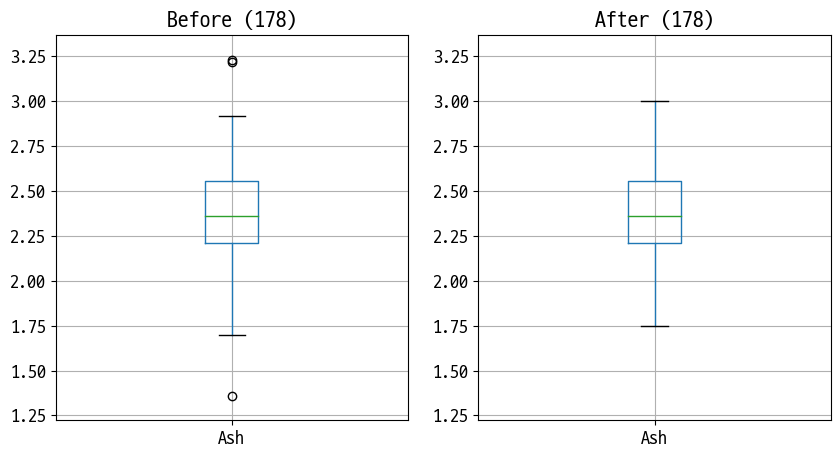

In [25]:
preps = clip_outlier(wine, ['Alcalinity_of_ash','Ash'], [(15,25),(1.75,3)])

# Alcalinity_of_ash의 클리핑 전후
before = wine[['Alcalinity_of_ash']]
before_after_boxplot(before, preps[['Alcalinity_of_ash']])

# Ash의 클리핑 전후
before = wine[['Ash']]
before_after_boxplot(before, preps[['Ash']])

### 클래스 불균형 처리

- 클래스 불균형 데이터 생성하기

In [26]:
data = load_breast_cancer()
df = pd.DataFrame(np.c_[data['data'], data['target']], columns=['x%s' %i for i in range(data['data'].shape[1])]+['y'])

print('original data의 class 분포:', Counter(data['target']))
df1 = df[df['y']==0].sample(50)
df2 = df[df['y']==1].sample(250)
# 전체 특성 중 4개만 사용
imb_df = pd.concat([df1,df2]).reset_index(drop=True).iloc[:,-5:]
print('imbalanced data의 calss 분포:\n', Counter(imb_df['y']))

features = imb_df.drop('y', axis=1)
target = imb_df['y']

print(imb_df.head(3))

original data의 class 분포: Counter({1: 357, 0: 212})
imbalanced data의 calss 분포:
 Counter({1.0: 250, 0.0: 50})
      x26     x27     x28     x29    y
0  0.6376  0.1986  0.3147  0.1405  0.0
1  0.5274  0.1864  0.4270  0.1233  0.0
2  0.4967  0.1838  0.4753  0.1013  0.0


- 랜덤오버샘플링

imbalanced data의 class 분포: Counter({1.0: 250, 0.0: 50})
oversampled data의 class 분포: Counter({0.0: 250, 1.0: 250})


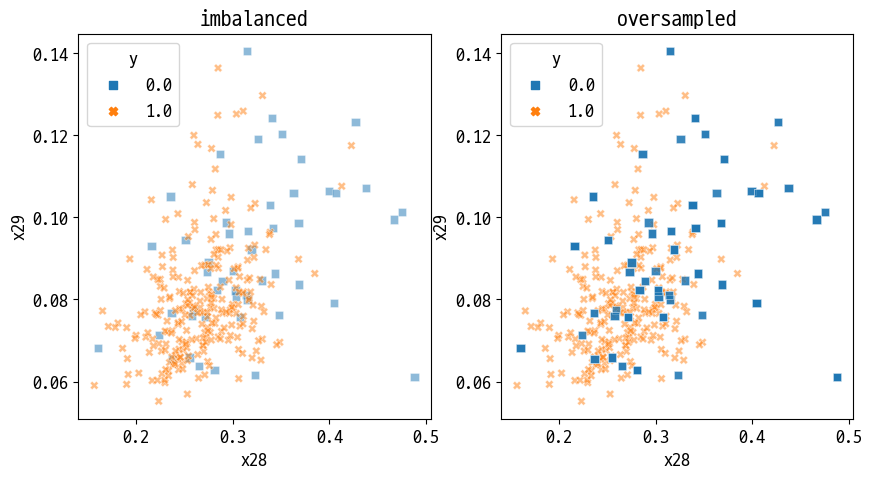

In [27]:
os = RandomOverSampler()
bal_features, bal_target = os.fit_resample(features, target)
print('imbalanced data의 class 분포: %s' % Counter(target))
print('oversampled data의 class 분포: %s' % Counter(bal_target))

over_df1 = pd.DataFrame(np.c_[bal_features, bal_target], columns=imb_df.columns)

fig, ax = plt.subplots(1,2)
ax[0].set_title('imbalanced')
ax[1].set_title('oversampled')
sns.scatterplot(x='x28', y='x29', hue='y', data=imb_df, ax=ax[0], alpha=0.5, style='y', markers=['s','X'])
sns.scatterplot(x='x28', y='x29', hue='y', data=over_df1, ax=ax[1], alpha=0.5, style='y', markers=['s','X'])

plt.show()

- SMOTE(Synthetic minority oversampling technique)
  - 임의의 소수 클래스 데이터로부터 인근 소수 클래스 사이에 새로운 데이터를 생성하는 방법

imbalanced data의 class 분포: Counter({1.0: 250, 0.0: 50})
oversampled data의 class 분포: Counter({0.0: 250, 1.0: 250})


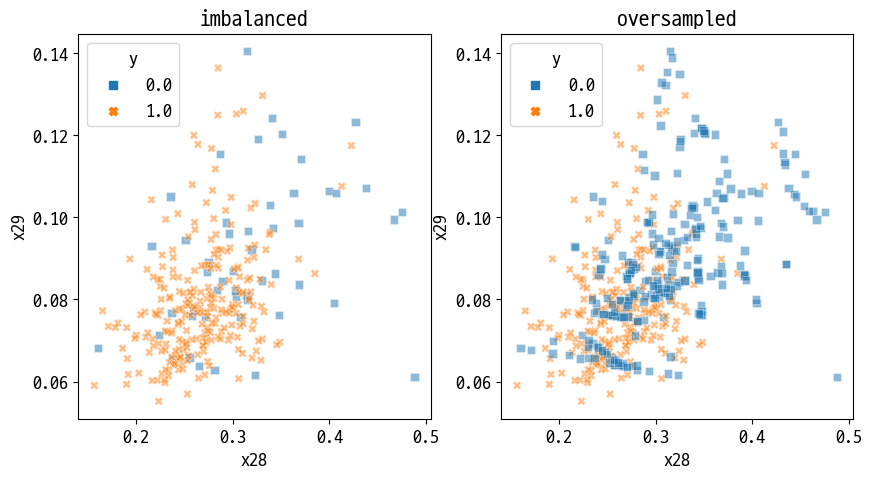

In [28]:
os = SMOTE(random_state=42, k_neighbors=3)
bal_features, bal_target = os.fit_resample(features, target)
print('imbalanced data의 class 분포: %s' % Counter(target))
print('oversampled data의 class 분포: %s' % Counter(bal_target))

over_df2 = pd.DataFrame(np.c_[bal_features, bal_target], columns=imb_df.columns)

fig, ax = plt.subplots(1,2)
ax[0].set_title('imbalanced')
ax[1].set_title('oversampled')
sns.scatterplot(x='x28', y='x29', hue='y', data=imb_df, ax=ax[0], alpha=0.5, style='y', markers=['s','X'])
sns.scatterplot(x='x28', y='x29', hue='y', data=over_df2, ax=ax[1], alpha=0.5, style='y', markers=['s','X'])

plt.show()

- Borderline SMOTE 
  - 다수 클래스와 소수 클래스를 구분하는 선을 그을 때 경계선에 있는 소수 클래스에 SMOTE기법 적용하는 방법

imbalanced data의 class 분포: Counter({1.0: 250, 0.0: 50})
oversampled data의 class 분포: Counter({0.0: 250, 1.0: 250})


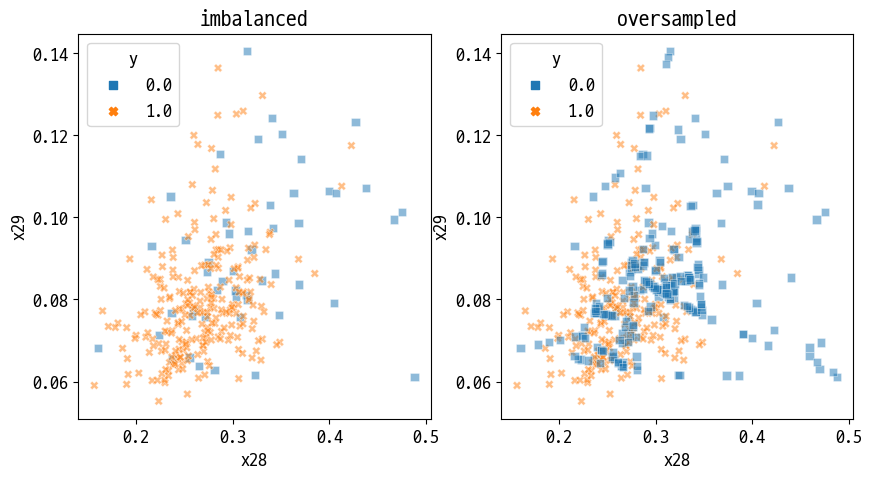

In [29]:
os = BorderlineSMOTE(random_state=0, k_neighbors=5)
bal_features, bal_target = os.fit_resample(features, target)
print('imbalanced data의 class 분포: %s' % Counter(target))
print('oversampled data의 class 분포: %s' % Counter(bal_target))

over_df3 = pd.DataFrame(np.c_[bal_features,bal_target], columns=imb_df.columns)

fig, ax = plt.subplots(1,2)
ax[0].set_title('imbalanced')
ax[1].set_title('oversampled')
sns.scatterplot(x='x28', y='x29', hue='y', data=imb_df, ax=ax[0], alpha=0.5, style='y', markers=['s','X'])
sns.scatterplot(x='x28', y='x29', hue='y', data=over_df3, ax=ax[1], alpha=0.5, style='y', markers=['s','X'])

plt.show()

- K-means SMOTE

In [30]:
# os = KMeansSMOTE(random_state=0, k_neighbors=5)
# bal_features, bal_target = os.fit_resample(features, target)


- SVM SMOTE

imbalanced data의 class 분포: Counter({1.0: 250, 0.0: 50})
oversampled data의 class 분포: Counter({0.0: 250, 1.0: 250})


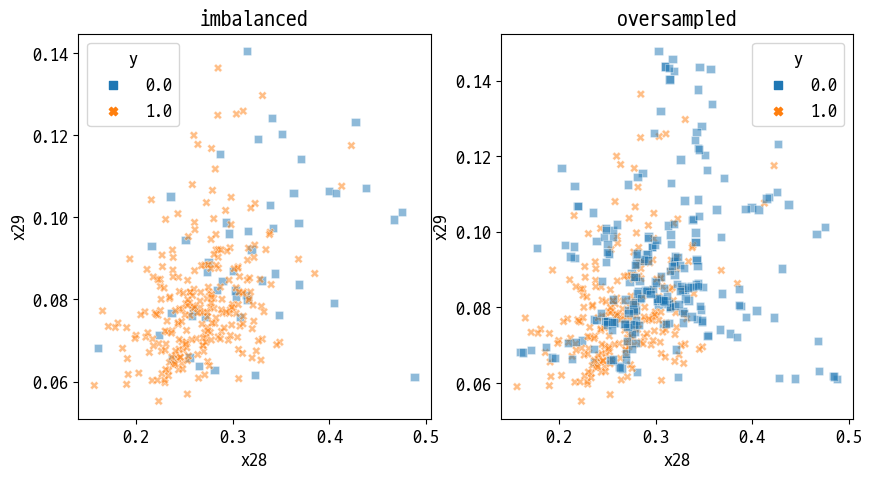

In [31]:
os = SVMSMOTE(random_state=0)
bal_features, bal_target = os.fit_resample(features, target)
print('imbalanced data의 class 분포: %s' % Counter(target))
print('oversampled data의 class 분포: %s' % Counter(bal_target))

over_df5 = pd.DataFrame(np.c_[bal_features,bal_target], columns=imb_df.columns)

fig, ax = plt.subplots(1,2)
ax[0].set_title('imbalanced')
ax[1].set_title('oversampled')
sns.scatterplot(x='x28', y='x29', hue='y', data=imb_df, ax=ax[0], alpha=0.5,
                style='y', markers=['s','X'])
sns.scatterplot(x='x28', y='x29', hue='y', data=over_df5, ax=ax[1], alpha=0.5,
                style='y', markers=['s','X'])

plt.show()

- ADASYN(Adaptive synthetic sampling)
  - 생성되는 샘플의 개수는 소수 클래스의 밀도에 반비례함.

imbalanced data의 class 분포: Counter({1.0: 250, 0.0: 50})
oversampled data의 class 분포: Counter({1.0: 250, 0.0: 246})


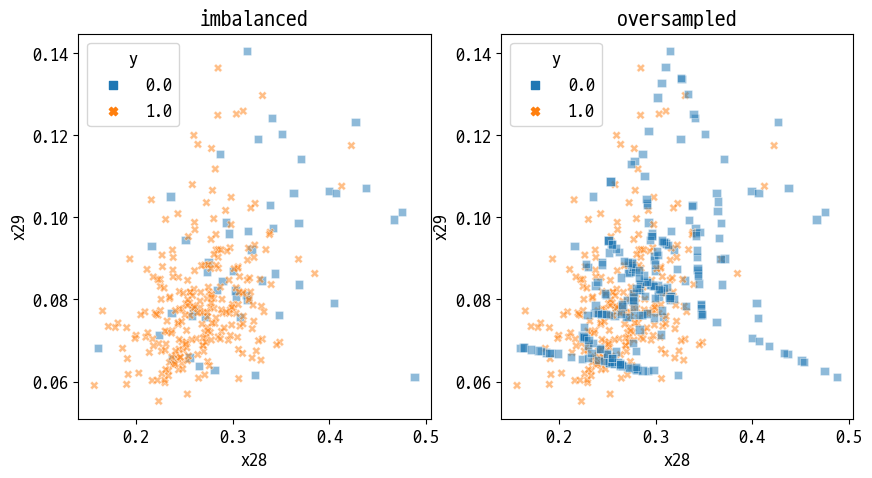

In [32]:
os = ADASYN(random_state=42, n_neighbors=3)
bal_features, bal_target = os.fit_resample(features, target)
print('imbalanced data의 class 분포: %s' % Counter(target))
print('oversampled data의 class 분포: %s' % Counter(bal_target))

over_df6 = pd.DataFrame(np.c_[bal_features, bal_target], columns=imb_df.columns)

fig, ax = plt.subplots(1,2)
ax[0].set_title('imbalanced')
ax[1].set_title('oversampled')
sns.scatterplot(x='x28', y='x29', hue='y', data=imb_df, ax=ax[0], alpha=0.5,
                style='y', markers=['s','X'])
sns.scatterplot(x='x28', y='x29', hue='y', data=over_df6, ax=ax[1], alpha=0.5,
                style='y', markers=['s','X'])


plt.show()

- 오버샘플링 데이터로 분류 학습 및 결과 비교

In [33]:
data = [imb_df, over_df1, over_df2, over_df3, over_df5, over_df6]
data_title = ['no oversampling', 'RandomOverSampler', 'SMOTE', 'BorderlineSMOTE', 
              'SVMSMOTE', 'ADASYN']
scores = pd.DataFrame(index=['Train acc', 'Test acc', 'Train F1', 'Test F1'], columns=data_title)
for df, title in zip(data, data_title) : 
    X = df.drop('y', axis=1)
    y = df['y']
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    lr = LogisticRegression(max_iter=300)
    lr.fit(X_train, y_train)
    pred_train = lr.predict(X_train)
    pred_test = lr.predict(X_test)
    scores.loc['Train acc', title] = accuracy_score(y_train, pred_train)
    scores.loc['Test acc', title] = accuracy_score(y_test, pred_test)
    scores.loc['Train Fl', title] = f1_score(y_train, pred_train)
    scores.loc['Test F1', title] = f1_score(y_test, pred_test)

print(scores)

          no oversampling RandomOverSampler     SMOTE BorderlineSMOTE  \
Train acc        0.835556          0.869333  0.853333        0.901333   
Test acc             0.84             0.864     0.904           0.832   
Train F1              NaN               NaN       NaN             NaN   
Test F1          0.911765           0.87218  0.894737        0.814159   
Train Fl         0.908189          0.870712  0.864198        0.897507   

           SVMSMOTE    ADASYN  
Train acc     0.896  0.827957  
Test acc      0.872  0.846774  
Train F1        NaN       NaN  
Test F1    0.868852  0.852713  
Train Fl   0.890756  0.829787  


### 변수변환

#### 수치형 변수 변환

In [34]:
diabetes = pd.read_csv('./data/2-4_diabetes.csv')
X = diabetes.filter(['Pregnancies', 'BloodPressure', 'BMI', 'Age']) # 4개 특징만 선정
y = diabetes['Outcome']

- 표준화

[Before] feature 별 데이터 분포 확인:
      Pregnancies  BloodPressure        BMI        Age
mean     3.845052      69.105469  31.992578  33.240885
std      3.369578      19.355807   7.884160  11.760232
max     17.000000     122.000000  67.100000  81.000000
min      0.000000       0.000000   0.000000  21.000000
[After] feature 별 데이터 분포 확인:
       Pregnancies  BloodPressure           BMI           Age
mean  2.544261e-17  -1.327244e-17  2.295979e-16  1.857600e-16
std   1.000652e+00   1.000652e+00  1.000652e+00  1.000652e+00
max   3.906578e+00   2.734528e+00  4.455807e+00  4.063716e+00
min  -1.141852e+00  -3.572597e+00 -4.060474e+00 -1.041549e+00


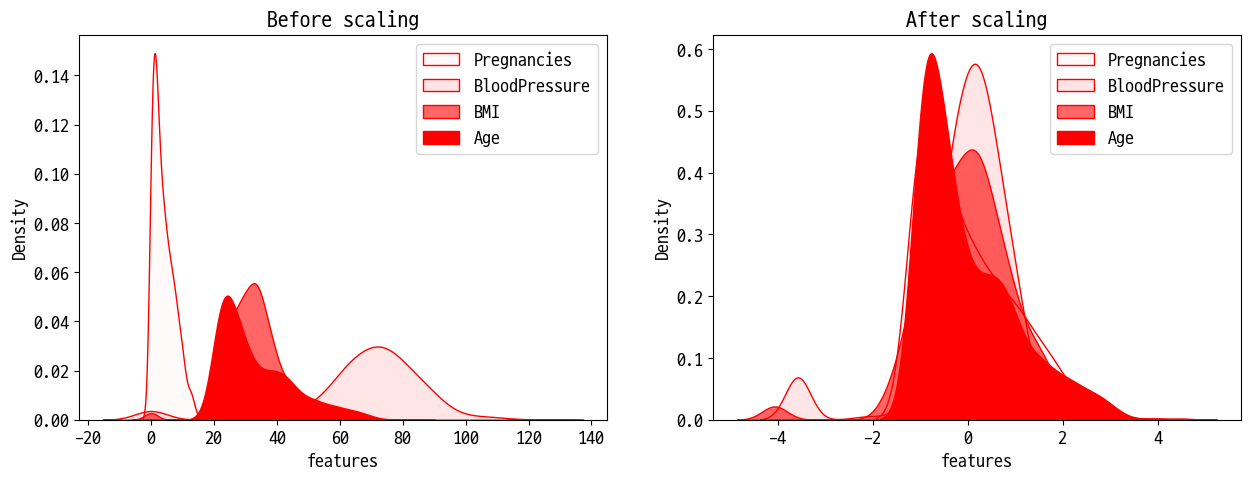

In [35]:
print('[Before] feature 별 데이터 분포 확인:')
print(X.describe().loc[['mean', 'std', 'max', 'min'], :])

# 표준화
ss = StandardScaler()
ss_X = ss.fit_transform(X)
ss_X = pd.DataFrame(ss_X, columns=X.columns)
print('[After] feature 별 데이터 분포 확인:')
print(ss_X.describe().loc[['mean', 'std', 'max', 'min'], :])

# 표준화 전후 데이터 분포 시각화
fig, ax = plt.subplots(1,2, figsize=(15,5))
for col, a in zip(X.columns, [0.02,0.1,0.6,1]) : 
    sns.kdeplot(X[col], alpha=a, legend=True, ax=ax[0], shade=True, color='r')
ax[0].legend(X.columns)
ax[0].set_xlabel('features')
ax[0].set_title('Before scaling')

for col, a in zip(ss_X.columns, [0.02,0.1,0.6,1]) : 
    sns.kdeplot(ss_X[col], alpha=a, legend=True, ax=ax[1], shade=True, color='r')
ax[1].legend(ss_X.columns)
ax[1].set_xlabel('features')
ax[1].set_title('After scaling')

plt.show()

- 최소최대 스케일링

[Before] feature 별 데이터 분포 확인:
      Pregnancies  BloodPressure        BMI        Age
mean     3.845052      69.105469  31.992578  33.240885
std      3.369578      19.355807   7.884160  11.760232
max     17.000000     122.000000  67.100000  81.000000
min      0.000000       0.000000   0.000000  21.000000
[After] feature 별 데이터 분포 확인:
      Pregnancies  BloodPressure       BMI       Age
mean      0.22618       0.566438  0.476790  0.204015
std       0.19821       0.158654  0.117499  0.196004
max       1.00000       1.000000  1.000000  1.000000
min       0.00000       0.000000  0.000000  0.000000


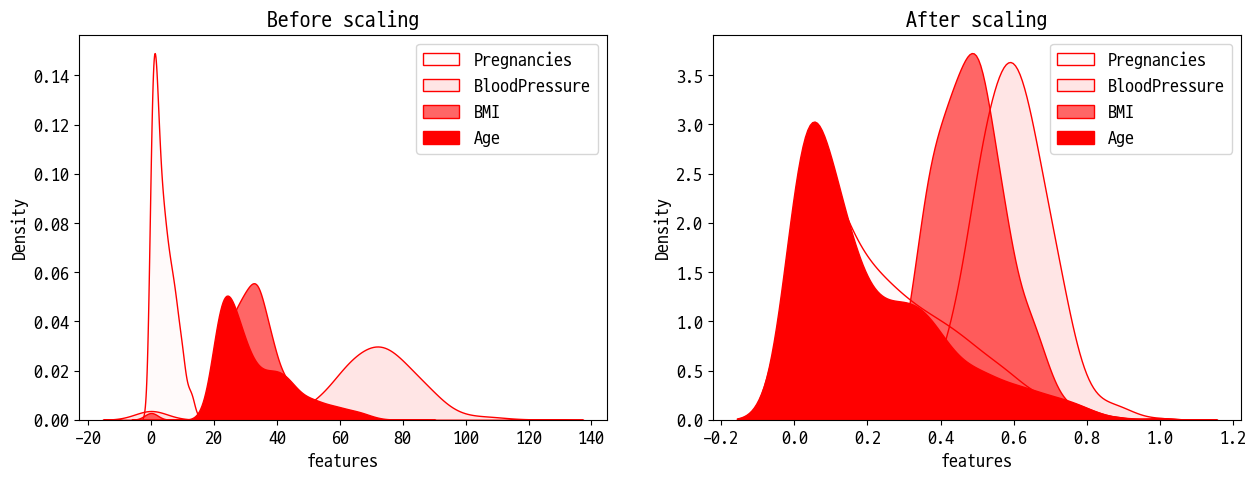

In [36]:
print('[Before] feature 별 데이터 분포 확인:')
print(X.describe().loc[['mean', 'std', 'max', 'min'],:])

# 특징 scaling
mm = MinMaxScaler()
mm_X = mm.fit_transform(X)
mm_X = pd.DataFrame(mm_X, columns=X.columns)
print('[After] feature 별 데이터 분포 확인:')
print(mm_X.describe().loc[['mean', 'std', 'max', 'min'], :])

# scaling 전후 데이터 분포 비교 시각화
fig, ax = plt.subplots(1,2, figsize=(15,5))
for col, a in zip(X.columns, [0.02, 0.1, 0.6, 1]) : 
    sns.kdeplot(X[col], alpha=a, legend=True, ax=ax[0], shade=True, color='r')
ax[0].legend(X.columns)
ax[0].set_xlabel('features')
ax[0].set_title('Before scaling')

for col, a in zip(mm_X, [0.02, 0.1, 0.6, 1]) : 
    sns.kdeplot(mm_X[col], alpha=a, legend=True, ax=ax[1], shade=True, color='r')
ax[1].legend(mm_X.columns)
ax[1].set_xlabel('features')
ax[1].set_title('After scaling')

plt.show()

- Robust scaling : 중앙값, 사분위수를 사용하기 때문에 이상치의 영향을 받지 않음.

[Before] feature 별 데이터 분포 확인:
      Pregnancies  BloodPressure        BMI        Age
mean     3.845052      69.105469  31.992578  33.240885
std      3.369578      19.355807   7.884160  11.760232
min      0.000000       0.000000   0.000000  21.000000
max     17.000000     122.000000  67.100000  81.000000
[After] feature 별 데이터 분포 확인:
      Pregnancies  BloodPressure       BMI       Age
mean     0.169010      -0.160807 -0.000798  0.249464
std      0.673916       1.075323  0.847759  0.691778
min     -0.600000      -4.000000 -3.440860 -0.470588
max      2.800000       2.777778  3.774194  3.058824


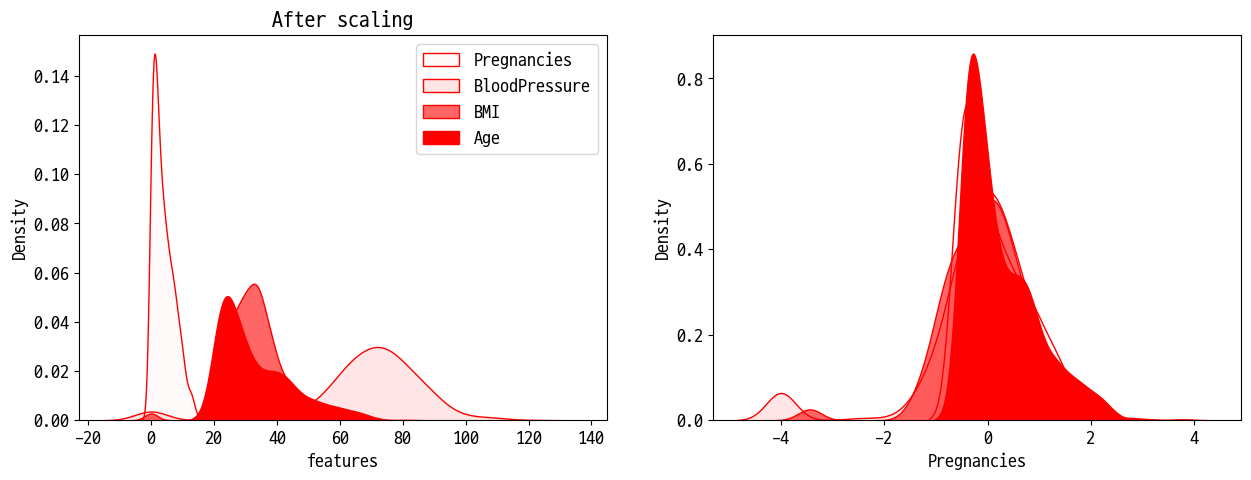

In [37]:
print('[Before] feature 별 데이터 분포 확인:')
print(X.describe().loc[['mean', 'std', 'min', 'max'], :])

# RobustScaler
rs = RobustScaler()
rs_X = rs.fit_transform(X)
rs_X = pd.DataFrame(rs_X, columns=X.columns)
print('[After] feature 별 데이터 분포 확인:')
print(rs_X.describe().loc[['mean', 'std', 'min', 'max'], :])

# scaling 전후 데이터 분포 시각화
fig, ax = plt.subplots(1,2, figsize=(15,5))
for col, a in zip(X.columns, [0.02, 0.1, 0.6, 1]) : 
    sns.kdeplot(X[col], alpha=a, legend=True, ax=ax[0], shade=True, color='r')
ax[0].legend(X.columns)
ax[0].set_xlabel('features')
ax[0].set_title('Before scaling')

for col, a in zip(rs_X.columns, [0.02, 0.1, 0.6, 1]) : 
    sns.kdeplot(rs_X[col], alpha=a, legend=True, ax=ax[1], shade=True, color='r')
ax[0].legend(rs_X.columns)
ax[0].set_xlabel('features')
ax[0].set_title('After scaling')

plt.show()

- Quantile scaling

[Before] feature 별 데이터 분포 확인:
      Pregnancies  BloodPressure        BMI        Age
mean     3.845052      69.105469  31.992578  33.240885
std      3.369578      19.355807   7.884160  11.760232
min      0.000000       0.000000   0.000000  21.000000
max     17.000000     122.000000  67.100000  81.000000
[After] feature 별 데이터 분포 확인:
      Pregnancies  BloodPressure       BMI       Age
mean     0.489773       0.499110  0.499972  0.496769
std      0.303331       0.290718  0.289391  0.294365
min      0.000000       0.000000  0.000000  0.000000
max      1.000000       1.000000  1.000000  1.000000


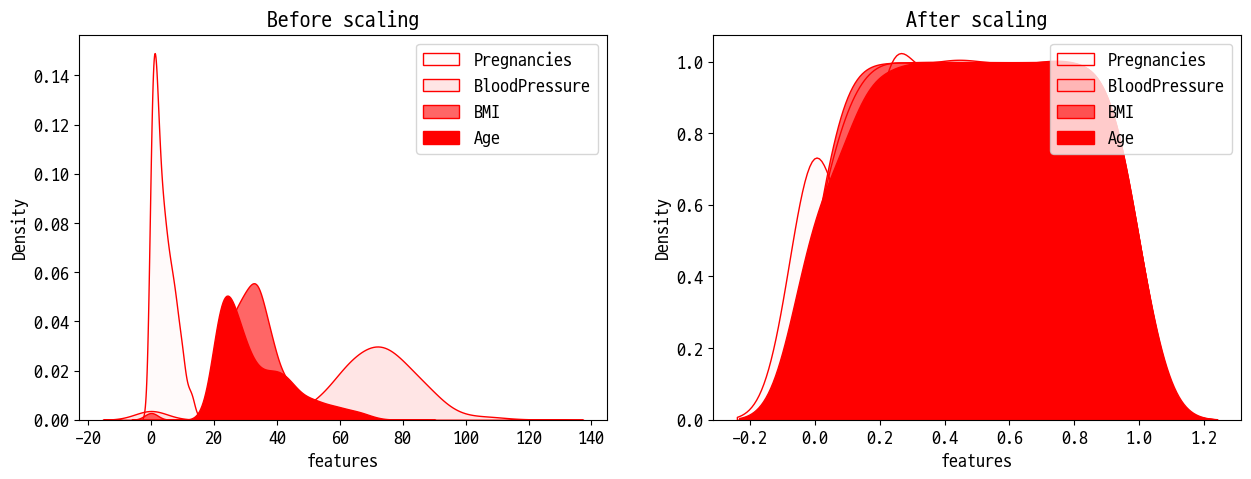

In [38]:
print('[Before] feature 별 데이터 분포 확인:')
print(X.describe().loc[['mean', 'std', 'min', 'max'], :])

# QuantileTransformer로 특징 scaling
qtu = QuantileTransformer(output_distribution='uniform', n_quantiles=len(X))
qtu_X = qtu.fit_transform(X)
qtu_X = pd.DataFrame(qtu_X, columns=X.columns)
print('[After] feature 별 데이터 분포 확인:')
print(qtu_X.describe().loc[['mean', 'std', 'min', 'max'], :])

# scaling 전후 데이터 분포 비교 시각화
fig, ax = plt.subplots(1,2, figsize=(15,5))
for col, a in zip(X.columns, [0.02, 0.1, 0.6, 1]) : 
    sns.kdeplot(X[col], alpha=a, legend=True, ax=ax[0], shade=True, color='r')
ax[0].legend(X.columns)
ax[0].set_xlabel('features')
ax[0].set_title('Before scaling')

for col, a in zip(qtu_X.columns, [0.02, 0.1, 0.6, 1]) : 
    sns.kdeplot(qtu_X[col], alpha=a, legend=True, ax=ax[1], shade=True, color='r')
ax[1].legend(qtu_X.columns)
ax[1].set_xlabel('features')
ax[1].set_title('After scaling')

plt.show()

[Before] feature 별 데이터 분포 확인:
      Pregnancies  BloodPressure        BMI        Age
mean     3.845052      69.105469  31.992578  33.240885
std      3.369578      19.355807   7.884160  11.760232
min      0.000000       0.000000   0.000000  21.000000
max     17.000000     122.000000  67.100000  81.000000
[After] feature 별 데이터 분포 확인:
      Pregnancies  BloodPressure       BMI       Age
mean    -0.518602      -0.137647 -0.034803 -0.270105
std      2.066619       1.426041  1.150110  1.696606
min     -5.199338      -5.199338 -5.199338 -5.199338
max      5.199338       5.199338  5.199338  5.199338


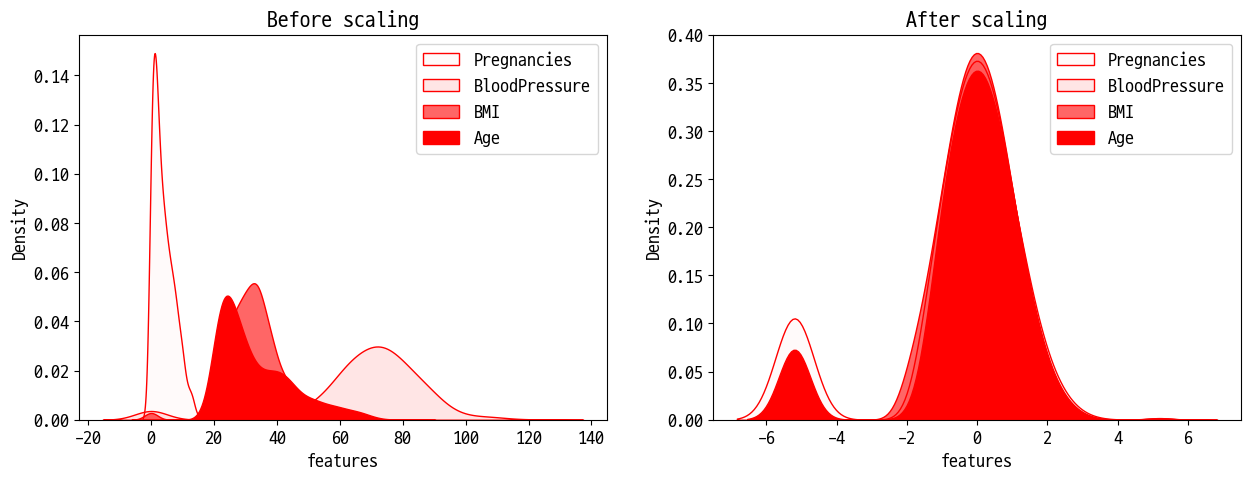

In [39]:
print('[Before] feature 별 데이터 분포 확인:')
print(X.describe().loc[['mean', 'std', 'min', 'max'], :])

# QuantileTransformer로 특징 scaling
qtn = QuantileTransformer(output_distribution='normal', n_quantiles=len(X))
qtn_X = qtn.fit_transform(X)
qtn_X = pd.DataFrame(qtn_X, columns=X.columns)
print('[After] feature 별 데이터 분포 확인:')
print(qtn_X.describe().loc[['mean', 'std', 'min', 'max'], :])

# scaling 전후 데이터 분포 비교 시각화
fig, ax = plt.subplots(1,2, figsize=(15,5))
for col, a in zip(X.columns, [0.02, 0.1, 0.6, 1]) : 
    sns.kdeplot(X[col], alpha=a, legend=True, ax=ax[0], shade=True, color='r')
ax[0].legend(X.columns)
ax[0].set_xlabel('features')
ax[0].set_title('Before scaling')

for col, a in zip(qtn_X.columns, [0.02, 0.1, 0.6, 1]) : 
    sns.kdeplot(qtn_X[col], alpha=a, legend=True, ax=ax[1], shade=True, color='r')
ax[1].legend(qtn_X.columns)
ax[1].set_xlabel('features')
ax[1].set_title('After scaling')

plt.show()

- Feature scaling한 데이터로 로지스틱 회귀 분석 결과 및 비교

In [40]:
data = [X, ss_X, rs_X, qtu_X, qtn_X]
y = diabetes['Outcome']
data_title = ['no scaling', 'StandardScaler', 'MinMaxScaler', 'RobustScaler', 
              'QuantileUniform', 'QuantileNormal']
scores = pd.DataFrame(index=['Train acc', 'Test acc', 'Train F1', 'Test F1'])
coeffs = pd.DataFrame(index=data_title, columns=X.columns)
for df, title in zip(data, data_title) : 
    X_train, X_test, y_train, y_test = train_test_split(df, y, random_state=0)
    lr = LogisticRegression(max_iter=300)
    lr.fit(X_train, y_train)
    pred_train = lr.predict(X_train)
    pred_test = lr.predict(X_test)
    scores.loc['Train acc', title] = accuracy_score(y_train, pred_train)
    scores.loc['Test acc', title] = accuracy_score(y_test, pred_test)
    scores.loc['Train F1', title] = f1_score(y_train, pred_train)
    scores.loc['Test F1', title] = f1_score(y_test, pred_test)
    coeffs.loc[title,:] = lr.coef_

print(scores)

           no scaling  StandardScaler  MinMaxScaler  RobustScaler  \
Train acc    0.687500        0.689236      0.689236      0.701389   
Test acc     0.692708        0.692708      0.692708      0.692708   
Train F1     0.470588        0.471976      0.471976      0.502890   
Test F1      0.404040        0.404040      0.404040      0.427184   

           QuantileUniform  
Train acc         0.680556  
Test acc          0.697917  
Train F1          0.468208  
Test F1           0.395833  


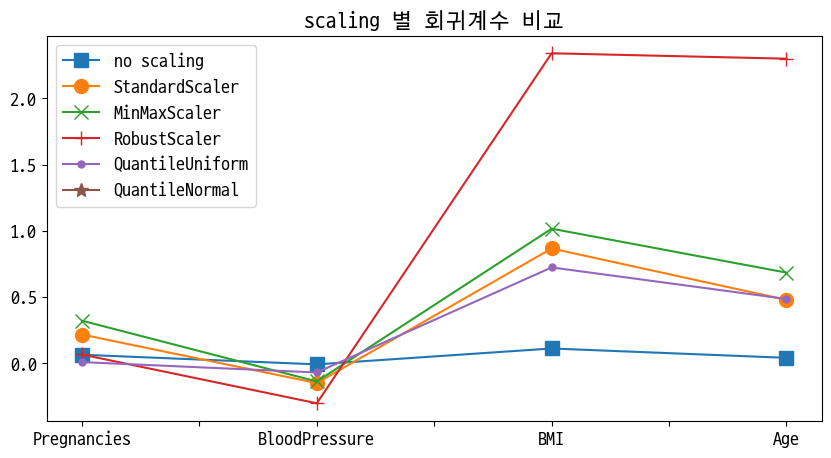

In [41]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.set_title('scaling 별 회귀계수 비교')
for i, marker in enumerate(['s', 'o', 'x', '+', '.', '*']) : 
    coeffs.T.iloc[:,i].plot(ax=ax, marker=marker, ms=10)
ax.legend()
plt.show()

- 로그 변환

In [42]:
realestate = pd.read_csv('./data/2-4_realestate.csv')
X = realestate.filter(['X2 house age', 'X3 distance to the nearest MRT station',
                       'X4 number of convenience stores']).rename(columns={'X2 house age':'X2',
                                                                           'X3 distance to the nearest MRT station':'X3',
                                                                           'X4 number of convenience stores':'X4'})
y = realestate[['Y house price of unit area']]

In [43]:
# 상용로그
y_log = np.log10(y)

# 자연로그
y_log2 = np.log(y)

# 자연로그+1
y_log3 = np.log1p(y)
# np.expm1()을 통해 원래대로 되돌릴 수 있음.

# 데이터의 절대값에 자연로그 변환을 한 후, 데이터의 원래 부호 붙임(마이너스도 사용 가능)
y_log4 = np.sign(y)*np.log(np.abs(y))

In [44]:
PTB = PowerTransformer(method='box-cox')
PTY = PowerTransformer(method='yeo-johnson')

# PTB는 양수 데이터만
y_ptb = pd.DataFrame(PTB.fit_transform(y), columns=y.columns)
y_pty = pd.DataFrame(PTY.fit_transform(y), columns=y.columns)

# 원래 데이터로 변환 : .inverse_transform()
y_ptb_inv = pd.DataFrame(PTB.inverse_transform(y_ptb), columns=y.columns)
print('**원본: \n', y.head(), '\n')
print('**변환 후: \n', y_ptb.head(), '\n')
print('**변환 후 inverse: \n', y_ptb_inv.head())

**원본: 
    Y house price of unit area
0                        37.9
1                        42.2
2                        47.3
3                        54.8
4                        43.1 

**변환 후: 
    Y house price of unit area
0                    0.069462
1                    0.376242
2                    0.723903
3                    1.208354
4                    0.438797 

**변환 후 inverse: 
    Y house price of unit area
0                        37.9
1                        42.2
2                        47.3
3                        54.8
4                        43.1


- Target scaling 한 데이터로 시각화, 선형 회귀 분석 및 결과 비교

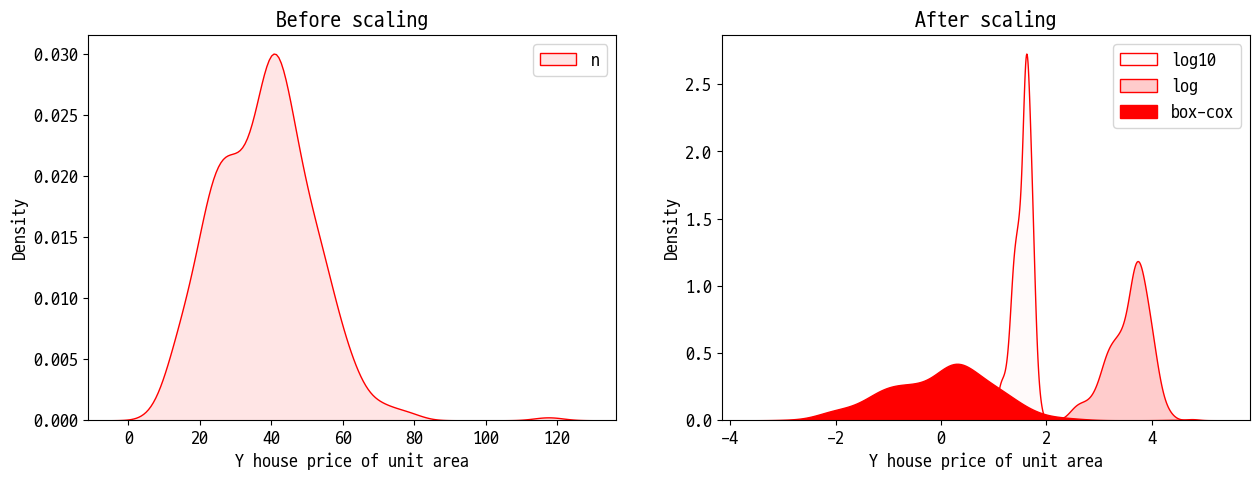

         no scaling     log10       log     log1p abs+log+sign   box-cox  \
Train r2   0.535784  0.653202  0.653202  0.651243     0.653202  0.595276   
Test r2     0.55253  0.574612  0.574612  0.578234     0.574612  0.577501   

         yeo-johnson  
Train r2    0.595382  
Test r2     0.577886  


In [45]:
data = [y, y_log, y_log2, y_ptb]
data_title = ['no scaling', 'log10', 'log', 'box-cox']
alphas = [0.1, 0.02, 0.2, 1]
fig, ax = plt.subplots(1,2, figsize=(15,5))
for i, df, a in zip(range(len(data)), data, alphas) : 
    if i==0 : 
        sns.kdeplot(df['Y house price of unit area'], ax=ax[0], alpha=a, shade=True, color='red')
        ax[0].legend(data_title[0])
        ax[0].set_title('Before scaling')
    else : 
        sns.kdeplot(df['Y house price of unit area'], ax=ax[1], alpha=a, shade=True, color='red')
        ax[1].legend(data_title[1:])
        ax[1].set_title('After scaling')

plt.show()

data = [y, y_log, y_log2, y_log3, y_log4, y_ptb, y_pty]
data_title = ['no scaling', 'log10', 'log', 'log1p', 'abs+log+sign', 'box-cox', 'yeo-johnson']
scores = pd.DataFrame(index=['Train r2', 'Test r2'], columns=data_title)
for df, title in zip(data, data_title) : 
    X_train, X_test, y_train, y_test = train_test_split(X, df, random_state=0)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    pred_train = lr.predict(X_train)
    pred_test = lr.predict(X_test)
    scores.loc['Train r2', title] = lr.score(X_train, y_train)
    scores.loc['Test r2', title] = lr.score(X_test, y_test)
print(scores)

- 순위로 변환

In [46]:
print('[Before] feature 별 데이터 분포 확인:')
print(X.describe().loc[['mean', 'std', 'max', "min"], :], '\n')

rank_X = X.rank(ascending=False)
print('[After] feature 별 데이터 분포 확인:')
print(rank_X.describe().loc[['mean', 'std', 'max', 'min'],:], '\n')

[Before] feature 별 데이터 분포 확인:
             X2           X3         X4
mean  17.712560  1083.885689   4.094203
std   11.392485  1262.109595   2.945562
max   43.800000  6488.021000  10.000000
min    0.000000    23.382840   0.000000 

[After] feature 별 데이터 분포 확인:
              X2          X3          X4
mean  207.500000  207.500000  207.500000
std   119.649372  119.649564  118.840631
max   406.000000  413.500000  381.000000
min     1.000000    1.000000    5.500000 



- 구간 분할

In [47]:
# pd.cut으로 구간 분할
binned = pd.cut(X['X2'], 5) # bin 수 지정
freq_df = pd.DataFrame(binned.value_counts()).reset_index().rename(columns={'index':'계급',
                                                                            'Age':'빈도'}).sort_values(by='계급',
                                                                                                     ascending=True)
print('bin수 지정:\n', freq_df, '\n')

bin_edges = [0, 10, 20, 30, 40, float('inf')]
# right=False: 0이상~10미만, 10이상~20미만, 20이상~30미만, 30이상~40미만, 40이상~
binned2 = pd.cut(X['X2'], bin_edges, right=False)  # bin의 범위 지정
freq_df2 = pd.DataFrame(binned2.value_counts()).reset_index().rename(columns={'index':'계급',
                                                                              'Age':'빈도'}).sort_values(by='계급',
                                                                                                       ascending=True)
print('bin범위 지정: \n', freq_df2, '\n')

bin수 지정:
                 계급   X2
1  (-0.0438, 8.76]  101
0    (8.76, 17.52]  146
3   (17.52, 26.28]   54
2   (26.28, 35.04]   77
4    (35.04, 43.8]   36 

bin범위 지정: 
              계급   X2
1   [0.0, 10.0)  109
0  [10.0, 20.0)  167
3  [20.0, 30.0)   43
2  [30.0, 40.0)   87
4   [40.0, inf)    8 



In [53]:
# KBinsDiscretizer로 구간 분할
# strategy = 'quantile', 'uniform', 'kmeans'
kb = KBinsDiscretizer(n_bins=5, strategy='quantile')
kb.fit(np.array(X['X2']).reshape(-1,1))
print('bin edges: ', kb.bin_edges_[0]) # 5개의 bin 구간이 생김.

# 계급 리스트인 bin_edges를 만듦.
kbbin = kb.bin_edges_[0]
bin_edges = []
for i in range(len(kbbin)) : 
    if len(kbbin)-1 != i : 
        tup = (int(kbbin[i]), int(kbbin[i+1]))
        bin_edges.append(tup)

kbinned = kb.transform(np.array(X['X2']).reshape(-1,1))
# 각 데이터가 어느 구간에 속하는지 원핫인코딩된 희소행렬로 반환
result = pd.DataFrame(kbinned.toarray(), columns=bin_edges)
print(result)

bin edges:  [ 0.   6.6 13.6 17.6 30.9 43.8]
     (0, 6)  (6, 13)  (13, 17)  (17, 30)  (30, 43)
0       0.0      0.0       0.0       0.0       1.0
1       0.0      0.0       0.0       1.0       0.0
2       0.0      1.0       0.0       0.0       0.0
3       0.0      1.0       0.0       0.0       0.0
4       1.0      0.0       0.0       0.0       0.0
..      ...      ...       ...       ...       ...
409     0.0      0.0       1.0       0.0       0.0
410     1.0      0.0       0.0       0.0       0.0
411     0.0      0.0       0.0       1.0       0.0
412     0.0      1.0       0.0       0.0       0.0
413     1.0      0.0       0.0       0.0       0.0

[414 rows x 5 columns]


#### 범주형 변수 변환

In [23]:
features = ['transmission', 'color', 'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
            'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state', 'drivetrain', 'price_usd']
cars = pd.read_csv('./data/2-4_cars.csv').filter(features)
cars['engine_has_gas'] = cars['engine_has_gas'].astype('int64')
print(cars.head(3))

  transmission   color  odometer_value  year_produced engine_fuel  \
0    automatic  silver          190000           2010    gasoline   
1    automatic    blue          290000           2002    gasoline   
2    automatic     red          402000           2001    gasoline   

   engine_has_gas engine_type  engine_capacity  body_type  has_warranty  \
0               0    gasoline              2.5  universal         False   
1               0    gasoline              3.0  universal         False   
2               0    gasoline              2.5        suv         False   

   state drivetrain  price_usd  
0  owned        all    10900.0  
1  owned        all     5000.0  
2  owned        all     2800.0  


- 원핫인코딩

In [24]:
# 원본 데이터
car_color = cars[['color']]
print('범주형 변수의 수준 개수: ', car_color.nunique())
print(car_color.head())

# 원핫인코딩한 데이터
ohe = OneHotEncoder()
car_color_ohe = pd.DataFrame(ohe.fit_transform(car_color).toarray(), columns=ohe.get_feature_names_out())
print('원핫인코딩 결과 feature의 개수: ', car_color_ohe.shape[1])
print(car_color_ohe.head())

범주형 변수의 수준 개수:  color    12
dtype: int64
    color
0  silver
1    blue
2     red
3    blue
4   black
원핫인코딩 결과 feature의 개수:  12
   color_black  color_blue  color_brown  color_green  color_grey  \
0          0.0         0.0          0.0          0.0         0.0   
1          0.0         1.0          0.0          0.0         0.0   
2          0.0         0.0          0.0          0.0         0.0   
3          0.0         1.0          0.0          0.0         0.0   
4          1.0         0.0          0.0          0.0         0.0   

   color_orange  color_other  color_red  color_silver  color_violet  \
0           0.0          0.0        0.0           1.0           0.0   
1           0.0          0.0        0.0           0.0           0.0   
2           0.0          0.0        1.0           0.0           0.0   
3           0.0          0.0        0.0           0.0           0.0   
4           0.0          0.0        0.0           0.0           0.0   

   color_white  color_yellow  
0     

- 더미코딩: 다중공선성 방지

In [25]:
# 원본 데이터
car_color = cars[['color']]
print('범주형 변수의 수준 개수: ', car_color.nunique())
print(car_color.head())

# 더미코딩한 데이터
car_color_dummy = pd.get_dummies(car_color, drop_first=True)
print('더미코딩한 결과 feature의 개수: ', car_color_dummy.shape[1])
print(car_color_dummy.head())

범주형 변수의 수준 개수:  color    12
dtype: int64
    color
0  silver
1    blue
2     red
3    blue
4   black
더미코딩한 결과 feature의 개수:  11
   color_blue  color_brown  color_green  color_grey  color_orange  \
0           0            0            0           0             0   
1           1            0            0           0             0   
2           0            0            0           0             0   
3           1            0            0           0             0   
4           0            0            0           0             0   

   color_other  color_red  color_silver  color_violet  color_white  \
0            0          0             1             0            0   
1            0          0             0             0            0   
2            0          1             0             0            0   
3            0          0             0             0            0   
4            0          0             0             0            0   

   color_yellow  
0             0  
1

- 숫자로 표현된 범주형 특성 변환

In [26]:
engine_has_gas = cars[['engine_has_gas']]
engine_has_gas_ohe1 = pd.get_dummies(engine_has_gas, columns=['engine_has_gas'])
print(engine_has_gas_ohe1.head())

   engine_has_gas_0  engine_has_gas_1
0                 1                 0
1                 1                 0
2                 1                 0
3                 1                 0
4                 1                 0


In [27]:
# 데이터 타입 변경
print('원본 데이터 타입: ', engine_has_gas.dtypes)
engine_has_gas = engine_has_gas.astype('category') # 또는 str
print('데이터 타입 변경 후: ', engine_has_gas.dtypes)

engine_has_gas_ohe2 = pd.get_dummies(engine_has_gas)
print(engine_has_gas_ohe2.head())

원본 데이터 타입:  engine_has_gas    int64
dtype: object
데이터 타입 변경 후:  engine_has_gas    category
dtype: object
   engine_has_gas_0  engine_has_gas_1
0                 1                 0
1                 1                 0
2                 1                 0
3                 1                 0
4                 1                 0


- 레이블 인코딩

In [29]:
# 원본: 범주형 변수 'engine_fuel'의 수준 및 각 빈도
print('원본:')
print(cars['engine_fuel'].value_counts(), '\n')

# 직접 코딩 1: df.replace
cars1 = cars.copy()
cars1['engine_fuel'] = cars1['engine_fuel'].replace({'gasoline':0,
                                                     'diesel':1, 'gas':2,
                                                     'hybrid-petrol':3, 'electric':4,
                                                     'hybrid-diesel':5})
print('Label encoding 후 (1):')
print(cars1['engine_fuel'].value_counts(), '\n')

# 직접 코딩 2: df.map()
cars2 = cars.copy()
cars2['engine_fuel'] = cars2['engine_fuel'].map({'gasoline':0, 'diesel':1, 'gas':2, 
                                                 'hybrid-petrol':3, 'electric':4, 'hybrid-diesel':5})
print('Label encoding 후 (2):')
print(cars2['engine_fuel'].value_counts(), '\n')

# 직접 코딩 3: df.cat.rename_categories
# 사전에 해당 변수의 데이터 타입을 category로 변환해주어야 함.
cars3 = cars.copy()
cars3['engine_fuel'] = cars3['engine_fuel'].astype('category')
cars3['engine_fuel'] = cars3['engine_fuel'].cat.rename_categories({'gasoline':0, 'diesel':1, 'gas':2, 
                                                                   'hybrid-petrol':3, 'electric':4, 
                                                                   'hybrid-diesel':5})
print('Label encoding 후 (3):')
print(cars3['engine_fuel'].value_counts())

원본:
gasoline         24065
diesel           12872
gas               1347
hybrid-petrol      235
electric            10
hybrid-diesel        2
Name: engine_fuel, dtype: int64 

Label encoding 후 (1):
0    24065
1    12872
2     1347
3      235
4       10
5        2
Name: engine_fuel, dtype: int64 

Label encoding 후 (2):
0    24065
1    12872
2     1347
3      235
4       10
5        2
Name: engine_fuel, dtype: int64 

Label encoding 후 (3):
0    24065
1    12872
2     1347
3      235
4       10
5        2
Name: engine_fuel, dtype: int64


In [31]:
# sklearn을 활용해보기
le = LabelEncoder()
le.fit(cars['engine_fuel'])
cars3 = le.transform(cars['engine_fuel'])
cars3 = pd.DataFrame(cars3, columns=['engine_fuel'])
print('Label endoing 후:')
print(cars3['engine_fuel'].value_counts())

Label endoing 후:
3    24065
0    12872
2     1347
5      235
1       10
4        2
Name: engine_fuel, dtype: int64
